In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor


In [32]:
# Cargar los datasets (ajusta las rutas a tus archivos)
job_postings = pd.read_csv(r"job_postings.csv")
locations = pd.read_csv(r"locations.csv")
position_types = pd.read_csv(r"position_types.csv")
seniority_levels = pd.read_csv(r"seniority_levels.csv")

In [19]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3333 non-null   int64  
 1   job_title           3333 non-null   object 
 2   job_info            3333 non-null   object 
 3   position_type_id    3333 non-null   int64  
 4   company             3333 non-null   object 
 5   city                3333 non-null   object 
 6   location_id         3333 non-null   int64  
 7   skills              810 non-null    object 
 8   seniority_level_id  3333 non-null   int64  
 9   work_type           3333 non-null   object 
 10  industry_type_id    3333 non-null   int64  
 11  min_salary          3333 non-null   float64
 12  max_salary          3333 non-null   float64
 13  avg_salary          3333 non-null   float64
 14  company_score       3333 non-null   float64
 15  sector              3333 non-null   object 
 16  respon

In [20]:
job_postings.work_type.value_counts()

work_type
Unspecified    1680
In-Person      1514
Remote          119
Hybrid           20
Name: count, dtype: int64

In [38]:
df=job_postings[['seniority_level_id','industry_type_id','position_type_id','location_id','avg_salary']].copy()

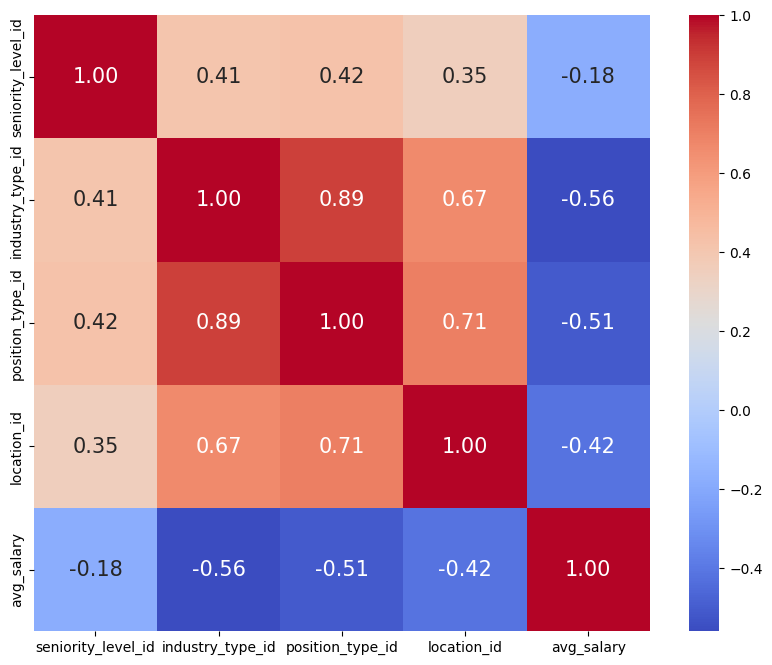

In [39]:
corr = df.corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, 
           yticklabels= df.columns,
           cmap= 'coolwarm')
plt.show()

In [37]:
#definimos las variables atributos y la variable a predecir 
#df = job_postings[['seniority_level_id','position_type_id','location_id','avg_salary']]

# Codificar las columnas categóricas usando One-Hot Encoding
#encoder = OneHotEncoder()
#encoded_features = encoder.fit_transform(df[['position', 'state', 'level','industry_type_id']]).toarray()

# Crear un nuevo DataFrame con las features codificadas y la target
#df_encoded = pd.DataFrame(encoded_features)
# Estandarizar la columna 'avg_salary'
scaler = StandardScaler()
df['salary'] = scaler.fit_transform(df['avg_salary'].values.reshape(-1, 1))
#df_encoded['salary'] = df['avg_salary']

# Dividir los datos en entrenamiento y prueba
X = df.drop(['salary','avg_salary','industry_type_id'], axis=1).values
y = df['salary'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear un modelo de Random Forest
model = RandomForestRegressor()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse.round(2))
print("Root Mean Squared Error:", rmse.round(2))
print("R2",r2.round(2))



Mean Squared Error: 0.73
Root Mean Squared Error: 0.86
R2 0.24


## Redes neuronales

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [43]:
# Unir los datasets por los IDs correspondientes
data = pd.merge(job_postings, locations, left_on='location_id', right_on='id', how='left')
# Eliminar las columnas duplicadas (opcional)
data = data.drop(['id_x', 'id_y'], axis=1)
data = pd.merge(data, position_types, left_on='position_type_id', right_on='id', how='left')
data = data.drop(['id'], axis=1)
data = pd.merge(data, seniority_levels, left_on='seniority_level_id', right_on='id', how='left')


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           3333 non-null   object 
 1   job_info            3333 non-null   object 
 2   position_type_id    3333 non-null   int64  
 3   company             3333 non-null   object 
 4   city                3333 non-null   object 
 5   location_id         3333 non-null   int64  
 6   skills              810 non-null    object 
 7   seniority_level_id  3333 non-null   int64  
 8   work_type           3333 non-null   object 
 9   industry_type_id    3333 non-null   int64  
 10  min_salary          3333 non-null   float64
 11  max_salary          3333 non-null   float64
 12  avg_salary          3333 non-null   float64
 13  company_score       3333 non-null   float64
 14  sector              3333 non-null   object 
 15  responsabilities    810 non-null    object 
 16  requir

In [54]:
# Codificar las columnas categóricas usando One-Hot Encoding
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(data[['position', 'state', 'level']]).toarray()

# Crear un nuevo DataFrame con las features codificadas y la target
df_encoded = pd.DataFrame(encoded_features)
# Estandarizar la columna 'avg_salary'
scaler = StandardScaler()
df_encoded['salary'] = scaler.fit_transform(data['avg_salary'].values.reshape(-1, 1))


# Dividir los datos en entrenamiento y prueba
X = df_encoded.drop('salary', axis=1).values
y = df_encoded['salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Definir el modelo
class SalaryPredictor(nn.Module, BaseEstimator):
  def __init__(self, input_size, hidden_size, output_size):
    super(SalaryPredictor, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

  # Implement the fit method for scikit-learn compatibility
  def fit(self, X, y):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    train_dataset = TensorDataset(X_tensor, y_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Train the model (same as before)
    for epoch in range(num_epochs):
      for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = self(inputs)  # Use self(inputs) for calling forward pass
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

      if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Hiperparámetros
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 100

# Crear el modelo, la función de pérdida y el optimizador
model = SalaryPredictor(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Crear dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluación
with torch.no_grad():
    y_pred = []
    for inputs, labels in test_loader:
        outputs = model(inputs)
        y_pred.extend(outputs.numpy().flatten())

y_pred = np.array(y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:",mse.round(2))
print("RMSE:", rmse.round(2))
print("R2:", r2.round(2))

MSE: 1.02
RMSE: 1.01
R2: 0.0
